## Binary Classification using Sklearn: Email Spam Classification

The dataset has been downloaded from: https://www2.aueb.gr/users/ion/data/enron-spam/. Only Enron1 was used which contains two folders with spam and non-spam emails. Code apart from preprocessing is based on https://towardsdatascience.com/how-to-build-your-first-spam-classifier-in-10-steps-fdbf5b1b3870. 

In [194]:
import os
import pandas as pd
import csv

## Preprocessing

In [135]:
# reset directory to Email Spam Classification
#os.chdir("..")
#os.chdir("..")

# header for csv file
header = ['spam', 'mail']

# Merge all spam and ham files into one csv file

with open("spamHam.csv", "w", encoding='utf-8') as fout:
    writer = csv.writer(fout)
    writer.writerow(header)
    # change directory to enron1/spam
    os.chdir('enron1')
    os.chdir('spam')
    for file in os.listdir():
        with open(file, "r") as fin:
            try:
                lol = list()
                stringOfContent = ""
                content = fin.readlines()
                for line in content:
                    stringOfContent+=line.replace("\n", " ")
                lol.append("spam")
                lol.append(stringOfContent)
                writer.writerow(lol)
                countSpam +=1
                
            except:
                continue
                
     # change directory to enron1/ham
    
    os.chdir("..")
    os.chdir('ham')
    for file in os.listdir():
        with open(file, "r") as fin:
            try:
                lol = list()
                stringOfContent = ""
                content = fin.readlines()
                for line in content:
                    stringOfContent+=line.replace("\n", " ")
                lol.append("ham")
                lol.append(stringOfContent)
                writer.writerow(lol)
                countHam += 1
                
            except:
                continue
                

1487 3672


## Exploring the data

In [227]:
# reset directory to Email Spam Classification

os.chdir("..")
os.chdir("..")

#os.chdir("/Users/rea/Documents/Email Spam Classification")
print(os.getcwd())

df = pd.read_csv(r'spamHam.csv',encoding='ISO-8859-1')
df.fillna('', inplace=True)
df

/Users/rea/Documents/Email Spam Classification


,spam,mail
0,spam,"Subject: what up , , your cam babe what are yo..."
1,spam,Subject: want to make more money ? order confi...
2,spam,Subject: food for thoughts [ join now - take a...
3,spam,Subject: miningnews . net newsletter - tuesday...
4,spam,Subject: your pharmacy ta would you want cheap...
...,...,...
5154,ham,Subject: class confirmation - stacey neuweiler...
5155,ham,"Subject: hpl noms for april 27 , 2001 ( see at..."
5156,ham,Subject: beaumont methanol - meter 1428 - octo...
5157,ham,Subject: re : free agents send me a request of...


In [228]:
df['spam'].value_counts()

ham     3672
spam    1487
Name: spam, dtype: int64

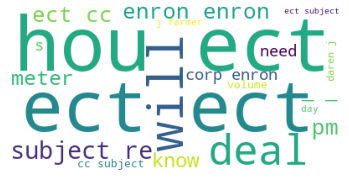

In [244]:
# displaying the most common words for ham mails

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# select ham rows
hamdf = df.loc[df['spam'] == 'ham']
stringHam = " ".join(hamdf["mail"])
ham = WordCloud(max_words=20,background_color = "white", stopwords=set(STOPWORDS)).generate(stringHam)
plt.imshow(ham)
plt.axis("off")
plt.show()

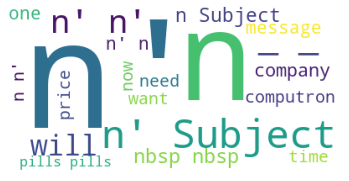

In [245]:
# displaying the most common words for spam mails

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# select ham rows
spamdf = df.loc[df['spam'] == 'spam']
stringSpam = " ".join(spamdf["mail"])
spam = WordCloud(max_words=20,background_color = "white", stopwords=set(STOPWORDS)).generate(stringSpam)
plt.imshow(spam)
plt.axis("off")
plt.show()

### not very informative though...

In [175]:
# convert spam/ham in numerical values (0 and 1)

df['spam'] = df['spam'].apply(lambda x: 1 if x == 'spam' else 0)

df

,spam,mail
0,1,"Subject: what up , , your cam babe what are yo..."
1,1,Subject: want to make more money ? order confi...
2,1,Subject: food for thoughts [ join now - take a...
3,1,Subject: miningnews . net newsletter - tuesday...
4,1,Subject: your pharmacy ta would you want cheap...
...,...,...
5154,0,Subject: class confirmation - stacey neuweiler...
5155,0,"Subject: hpl noms for april 27 , 2001 ( see at..."
5156,0,Subject: beaumont methanol - meter 1428 - octo...
5157,0,Subject: re : free agents send me a request of...


In [176]:
# split data
from sklearn.model_selection import train_test_split

In [177]:
x_train, x_test, y_train, y_test = train_test_split(df['mail'], df['spam'], test_size = 0.3, random_state = 0)

In [178]:
x_train 

2602    Subject: fw : customers - - - - - original mes...
576     Subject: urgent assistance good day , i am kin...
836     Subject: cruise 3 nts mexico only $ 197 ! - - ...
3537    Subject: falcon / lone star transport darren ,...
2759    Subject: hpl nomination for january 26 , 2000 ...
                              ...                        
4931    Subject: resume - anna cola anna cola is throu...
3264    Subject: ena organizational changes ena  , s ...
1653    Subject: i put in 35000 for the expected volum...
2607    Subject: final - name change / mergers spreads...
2732    Subject: fw : on call ( revised ) correction o...
Name: mail, Length: 3611, dtype: object

In [179]:
y_train

2602    0
576     1
836     1
3537    0
2759    0
       ..
4931    0
3264    0
1653    0
2607    0
2732    0
Name: spam, Length: 3611, dtype: int64

In [180]:
print('rows in test set: ' + str(x_test.shape))
print('rows in train set: ' + str(x_train.shape))

rows in test set: (1548,)
rows in train set: (3611,)


## Apply Tf-IDF Vectorizer for Feature Extraction

In [181]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer

In [183]:
lst = x_train.tolist()

vectorizer = TfidfVectorizer(
input=lst ,  # input is the actual text
lowercase=True,      # convert to lowercase before tokenizing
stop_words='english' # remove stop words
)
features_train_transformed = vectorizer.fit_transform(lst) #gives tf idf vector for x_train

features_test_transformed  = vectorizer.transform(x_test) #gives tf idf vector for x_test

In [184]:
countvectorizer = CountVectorizer(
    input=lst, 
    lowercase=True, 
    stop_words='english')

features_train_transformed.C = countvectorizer.fit_transform(lst) 
features_test_transformed.C  = countvectorizer.transform(x_test) 

## Logistic Regression

In [185]:
from sklearn.linear_model import LogisticRegression

In [186]:
classifier = LogisticRegression()
classifier.fit(features_train_transformed, y_train)

LogisticRegression()

## Model accuracy


In [187]:
print("classifier accuracy {:.2f}".format(classifier.score(features_test_transformed, y_test)))

classifier accuracy 0.99


In [188]:
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [189]:
actual = y_test.tolist() # our gold-standard
predicted = classifier.predict(features_test_transformed) # we are generating the predictions based on the trained model 

results = confusion_matrix(actual, predicted)

print('Confusion Matrix :')
print(results)
print ('Accuracy Score :',accuracy_score(actual, predicted))

print ('Report : ')
print (classification_report(actual, predicted) )
score_2 = f1_score(actual, predicted, average = 'binary')
print('F-Measure: %.3f' % score_2)

Confusion Matrix :
[[1098   11]
 [   3  436]]
Accuracy Score : 0.9909560723514211
Report : 
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1109
           1       0.98      0.99      0.98       439

    accuracy                           0.99      1548
   macro avg       0.99      0.99      0.99      1548
weighted avg       0.99      0.99      0.99      1548

F-Measure: 0.984
